In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the path for the CSV file
csv_file_path = r"C:\Users\Samsung\Desktop\Data-analytics\SteelBotProject\round_pipe_data_analysis.csv"

# Check if CSV file exists and load data
if os.path.exists(csv_file_path):
    # Load data from existing CSV file
    data = pd.read_csv(csv_file_path)
    print("Data loaded from the existing file", csv_file_path)
else:
    # data = get_round_pipe_data_analysis()
    print("No dataFrame found")

# Data cleaning
data.fillna(0, inplace=True)


Data loaded from the existing file C:\Users\Samsung\Desktop\Data-analytics\SteelBotProject\round_pipe_data_analysis.csv


In [9]:
# Type conversion
data['length'] = data['length'].astype(float)
data['weight'] = data['weight'].astype(float)
data['diameter'] = data['diameter'].astype(float)
data['wall_thickness'] = data['wall_thickness'].astype(float)
data['count'] = data['count'].astype(int)
data

,nomenclature_id,nomenclature,diameter,wall_thickness,material,length,weight,count
0,1,Round pipe,157.0,4.0,Titanium alloys,20.0,173.0400,3
1,2,Round pipe,157.0,8.0,Titanium alloys,8.0,134.8120,1
2,3,Round pipe,57.0,8.0,Titanium alloys,8.0,44.3340,1
3,4,Round pipe,157.0,4.0,Stainless steel,21.0,17.6095,3
4,5,Round pipe,57.0,8.0,Stainless steel,9.0,87.7820,2
5,6,Round pipe,18.0,1.0,Stainless steel,1.0,0.4230,1
6,7,Round pipe,48.0,4.0,Stainless steel,1.0,4.3790,1
7,8,Round pipe,22.0,2.0,Stainless steel,1.0,0.9950,1
8,9,Round pipe,22.0,2.0,Aluminium alloys,1.0,0.3140,1
9,10,Round pipe,22.0,4.0,Aluminium alloys,1.0,0.5650,1


In [27]:

# Outlier detection and management
for column in ['length', 'weight', 'diameter', 'wall_thickness']:
    median = data[column].median()
    std_dev = data[column].std()
    upper_limit = median + 3 * std_dev
    # Вывод информации о выбросах
    # Output information about outliers
    print(f"Column: {column}")
    print(f"\n Median: {median}, Std Dev: {std_dev}, Upper Limit: {upper_limit}")
    # Вывод значений, которые будут изменены
    # Output values that will be changed
    outliers_before = data[data[column] > upper_limit][column]
    print("\n Outliers before adjustment:\n", outliers_before)
    # Замена выбросов на медиану
    # Replace outliers with the median
    data.loc[data[column] > upper_limit, column] = median
     # Вывод значений после замены
    # Output values after replacement
    outliers_after = data[data[column] == median][column]
    print("\n Values after adjustment (set to median):\n", outliers_after)



Column: length

 Median: 2.5, Std Dev: 6.581539840088083, Upper Limit: 22.244619520264248

 Outliers before adjustment:
 Series([], Name: length, dtype: float64)

 Values after adjustment (set to median):
 Series([], Name: length, dtype: float64)
Column: weight

 Median: 15.46475, Std Dev: 57.854381707357525, Upper Limit: 189.02789512207258

 Outliers before adjustment:
 Series([], Name: weight, dtype: float64)

 Values after adjustment (set to median):
 Series([], Name: weight, dtype: float64)
Column: diameter

 Median: 57.0, Std Dev: 60.21624227177692, Upper Limit: 237.64872681533075

 Outliers before adjustment:
 Series([], Name: diameter, dtype: float64)

 Values after adjustment (set to median):
 2     57.0
4     57.0
10    57.0
12    57.0
13    57.0
Name: diameter, dtype: float64
Column: wall_thickness

 Median: 4.0, Std Dev: 2.600480724789169, Upper Limit: 11.801442174367507

 Outliers before adjustment:
 Series([], Name: wall_thickness, dtype: float64)

 Values after adjustment

In [8]:
# Descriptive statistics for key variables
description = data[['length', 'weight', 'diameter', 'wall_thickness']].describe()
print("Descriptive statistics for key variables:\n", description)

Descriptive statistics for key variables:
          length      weight    diameter  wall_thickness
count  16.00000   16.000000   16.000000       16.000000
mean    5.87500   43.947906   84.562500        5.312500
std     6.58154   57.854382   60.216242        2.600481
min     1.00000    0.314000   18.000000        1.000000
25%     1.00000    3.533000   41.500000        4.000000
50%     2.50000   15.464750   57.000000        4.000000
75%     8.00000   55.196000  157.000000        8.000000
max    21.00000  173.040000  189.000000        8.000000


In [18]:

# Additional descriptive statistics
print("Mean values for key variables:\n", data[['length', 'weight', 'diameter', 'wall_thickness']].mean())
print("\n Median values for key variables:\n", data[['length', 'weight', 'diameter', 'wall_thickness']].median())
print("\n Standard deviation for key variables:\n", data[['length', 'weight', 'diameter', 'wall_thickness']].std())

Mean values for key variables:
 length             5.875000
weight            43.947906
diameter          84.562500
wall_thickness     5.312500
dtype: float64

 Median values for key variables:
 length             2.50000
weight            15.46475
diameter          57.00000
wall_thickness     4.00000
dtype: float64

 Standard deviation for key variables:
 length             6.581540
weight            57.854382
diameter          60.216242
wall_thickness     2.600481
dtype: float64


In [28]:
# Mode based on the most popular diameter and wall thickness combinations
mode_data = data.groupby(['diameter', 'wall_thickness'])['count'].sum()
most_common = mode_data.idxmax()
most_common_count = mode_data.max()

print("Most popular combination of diameter and wall thickness (mode):\n", most_common)
print("\n Number of requests for this combination:", most_common_count)

Most popular combination of diameter and wall thickness (mode):
 (157.0, 4.0)

 Number of requests for this combination: 6


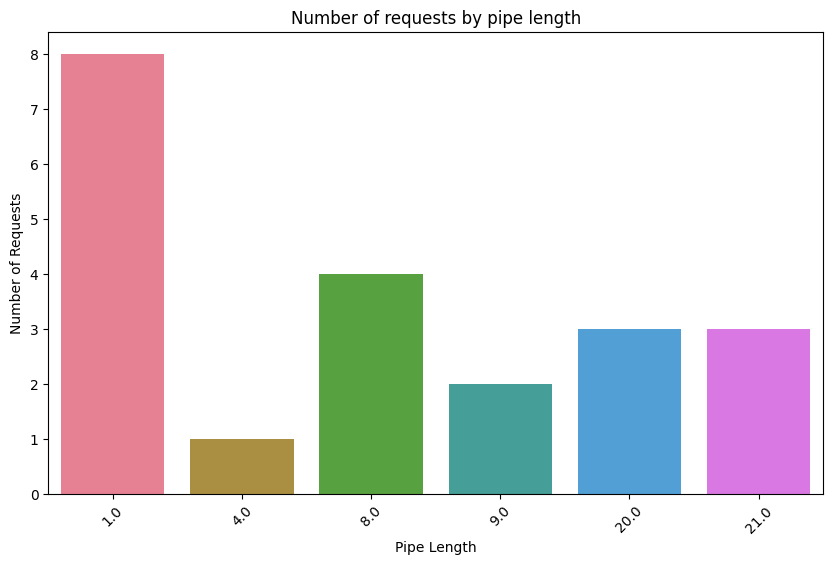

In [29]:
# Visualization
# Visualizing the distribution of pipe lengths based on the number of requests
plt.figure(figsize=(10, 6))

# Grouping data by length and summing the number of requests
length_counts = data.groupby('length')['count'].sum().reset_index()

# Creating color palette
colors = sns.color_palette("husl", len(length_counts))  # "husl" generates a variety of colors

# Using hue to represent length and removing the legend
sns.barplot(x='length', y='count', data=length_counts, hue='length', palette=colors, legend=False)

plt.title("Number of requests by pipe length")
plt.xlabel("Pipe Length")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45)
plt.show()

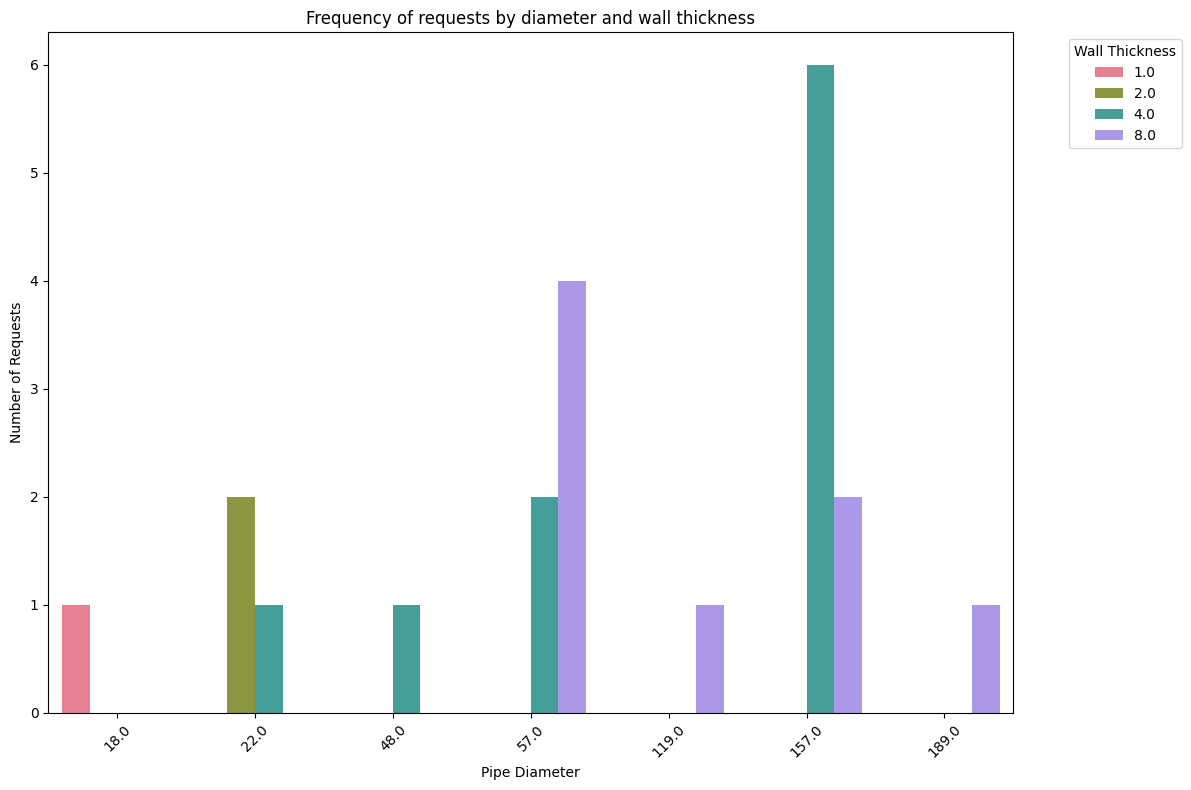

In [30]:
# Visualization of diameter and wall thickness distribution based on the number of requests
plt.figure(figsize=(12, 8))

# Grouping data by diameter and wall thickness, summing the number of requests
diameter_thickness_counts = data.groupby(['diameter', 'wall_thickness'])['count'].sum().reset_index()

# Unique values for wall thickness
unique_wall_thickness = diameter_thickness_counts['wall_thickness'].unique()

# Creating color palette
colors = sns.color_palette("husl", len(unique_wall_thickness))  # Generating colors based on the number of unique values

# Creating columns for display with proper offset
sns.barplot(x='diameter', y='count', hue='wall_thickness', data=diameter_thickness_counts, palette=colors, dodge=True)

plt.title("Frequency of requests by diameter and wall thickness")
plt.xlabel("Pipe Diameter")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45)

# Adjusting legend location
plt.legend(title="Wall Thickness", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Prevent overlap of plots and labels
plt.show()

In [32]:
# Investigating the relationship between pipe weight, diameter, and wall thickness
# Checking data types and NaN values
print("Data types in the loaded data:\n", data.dtypes)
print("\n Number of NaN values in each column:\n", data.isna().sum())

# Creating a new column for weight per meter with accuracy control
data['weight_per_meter'] = data['weight'] / data['length']

# Checking values in the new column
print("\n Data with the calculated column weight_per_meter:")
print(data[['weight', 'length', 'weight_per_meter']])

Data types in the loaded data:
 nomenclature_id       int64
nomenclature         object
diameter            float64
wall_thickness      float64
material             object
length              float64
weight              float64
count                 int32
weight_per_meter    float64
dtype: object

 Number of NaN values in each column:
 nomenclature_id     0
nomenclature        0
diameter            0
wall_thickness      0
material            0
length              0
weight              0
count               0
weight_per_meter    0
dtype: int64

 Data with the calculated column weight_per_meter:
      weight  length  weight_per_meter
0   173.0400    20.0          8.652000
1   134.8120     8.0         16.851500
2    44.3340     8.0          5.541750
3    17.6095    21.0          0.838548
4    87.7820     9.0          9.753556
5     0.4230     1.0          0.423000
6     4.3790     1.0          4.379000
7     0.9950     1.0          0.995000
8     0.3140     1.0          0.314000
9     0.5

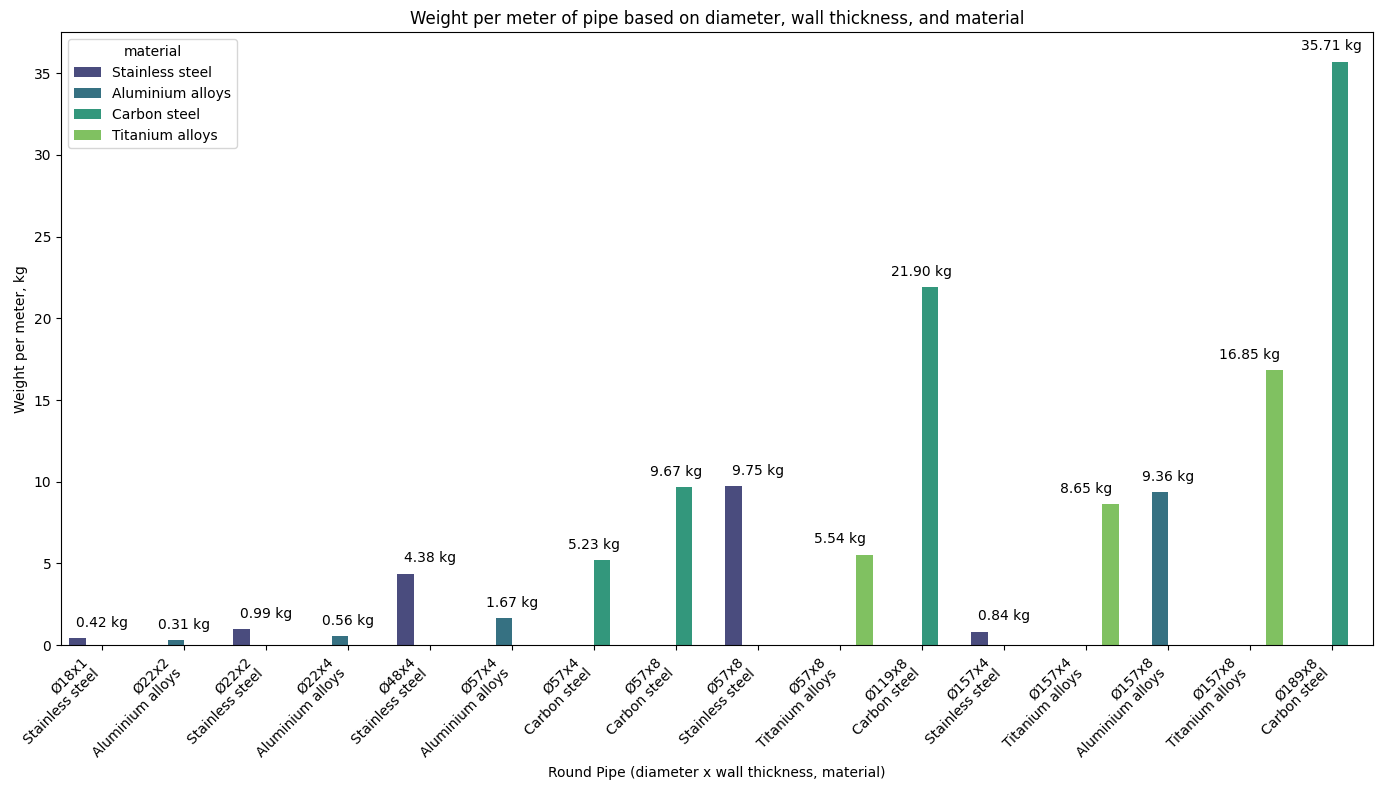

In [33]:
# Plotting
if 'material' in data.columns:
    plt.figure(figsize=(14, 8))

    # Grouping data by diameter, wall thickness, and material, summing total weight and length
    weight_counts = data.groupby(['diameter', 'wall_thickness', 'material']).agg(
        total_weight=('weight', 'sum'),
        total_length=('length', 'sum')
    ).reset_index()

    # Adding weight per meter
    weight_counts['weight_per_meter'] = weight_counts['total_weight'] / weight_counts['total_length']

    # Creating labels for x-axis
    weight_counts['label'] = weight_counts.apply(
        lambda x: f"Ø{int(x['diameter'])}x{int(x['wall_thickness'])}\n{x['material']}",
        axis=1
    )

    # Building histogram
    sns.barplot(x='label', y='weight_per_meter', data=weight_counts, palette='viridis', hue='material', dodge=True)

    plt.title("Weight per meter of pipe based on diameter, wall thickness, and material")
    plt.xlabel("Round Pipe (diameter x wall thickness, material)")
    plt.ylabel("Weight per meter, kg")

    # Rotating labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Adding values on columns
    for index, row in enumerate(weight_counts.itertuples(), start=0):
        plt.text(
            index,
            row.weight_per_meter + 0.5,
            f"{row.weight_per_meter:.2f} kg",
            color='black',
            ha="center",
            va="bottom"
        )

    plt.tight_layout()  # Prevent overlaps of chart elements

plt.show()

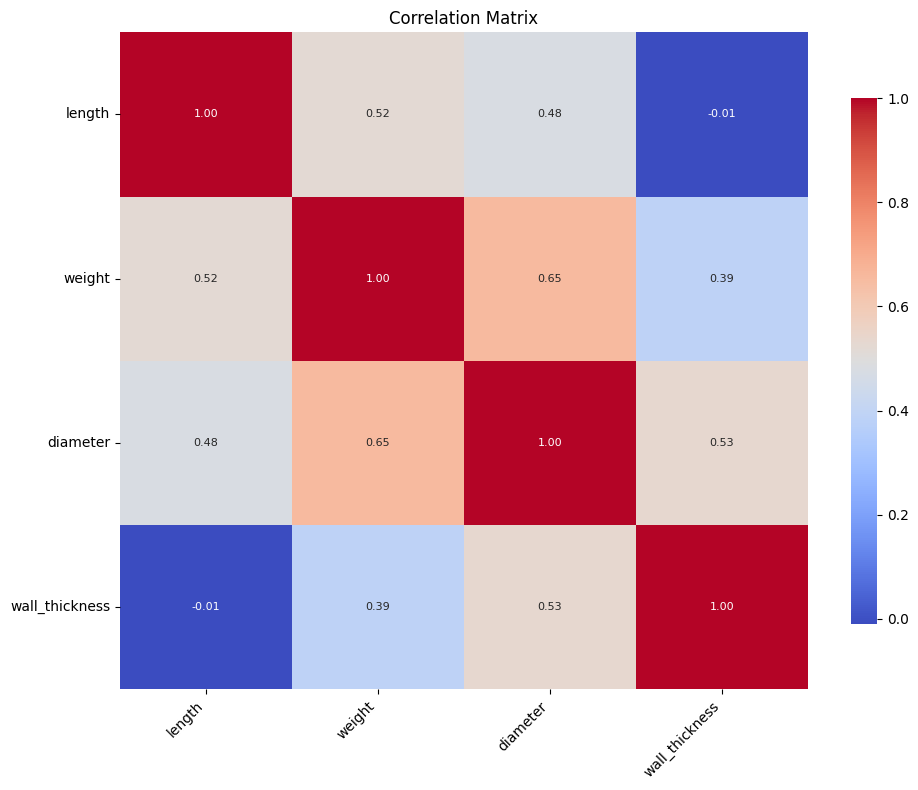

In [34]:
# Correlation matrix for numerical columns
numeric_data = data[['length', 'weight', 'diameter', 'wall_thickness']]
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            cbar_kws={'shrink': .8}, annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

The machine learning model based on RandomForestRegressor is implemented in the ProductForecast class (file forecast.py) of the project because it was necessary to have the implementation of the machine learning model directly within the project SteelBot to understand the essence of its implementation.